# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for the visualizations
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [11]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

(10, 2)

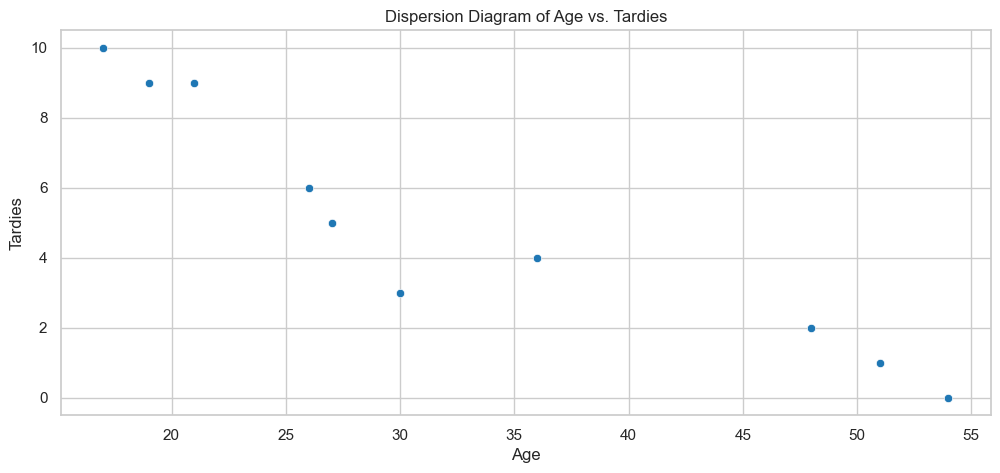

In [12]:

#plt.scatter(x, y)
display(student_data.shape)
student_data.head()

# Create the scatter plot
sns.scatterplot(data=student_data, x='Age', y='Tardies')

#Add title
plt.title('Dispersion Diagram of Age vs. Tardies')
plt.show() 
#You can see a trend on the scatterplot of less tardies the older the student


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

__You can see a trend on the scatterplot of less tardies the older the student. The exception of this would be the student between 35 and 40 yo (ID 5).__

__Hypothesis: As students age, they become more responsible and less likely to be tardy. This could explain why older students have fewer tardies__

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [13]:
# Calculate the covariance between 'Age' and 'Tardies'
# np.cov() returns a covariance matrix, so we select the [0, 1] element to get the covariance value
covariance = np.cov(student_data['Age'], student_data['Tardies'])[0, 1]

# Calculate the Pearson correlation coefficient between 'Age' and 'Tardies'
# np.corrcoef() returns a correlation matrix, so we select the [0, 1] element to get the correlation value
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])[0, 1]

# Print the calculated covariance and correlation values between Age and Tardies
print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Explanation from chatgpt

Covariance and correlation both measure the relationship between two variables, but they do so in different ways:

1. **Covariance**:
   - The covariance value is a measure of how much two random variables change together. If the variables tend to increase together, the covariance is positive. If one variable tends to increase when the other decreases, the covariance is negative.
   - Covariance is not standardized, meaning its value depends on the units of the variables. In this case, the covariance between Age and Tardies is -45.57.

2. **Correlation**:
   - The correlation (specifically the Pearson correlation coefficient) is a standardized measure of the strength and direction of the relationship between two variables. It ranges from -1 to 1.
   - A correlation of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.
   - In this case, the correlation between Age and Tardies is approximately -0.939, indicating a very strong negative linear relationship.

**Comparison and Interpretation**:
- The negative covariance value (-45.57) suggests that there is an inverse relationship between Age and Tardies.
- The correlation value (-0.939) not only confirms the inverse relationship but also quantifies it in a standardized way, showing that the relationship is very strong.
- This means that, generally, as the age of the students increases, the number of tardies decreases significantly, which aligns with our initial observations from the scatter plot. 


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Type of regression: Linear Regression
# This approach assumes that the relationship between age and tardies is approx. linear.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



y = student_data['Tardies'] # Outcome variable (dependent variable)
X = student_data[['Age']] # Predictor variable (independent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#By setting random_state to a fixed value (random_state=0), the function will split the 
#dataset in the same way every time we run the code, ensuring consistent results.


# Create the Linear Regression estimator
lm = LinearRegression()
lm.fit(X_train, y_train) # This step adjusts the model's parameters to minimize the prediction error

print(f"LM Intercept: {lm.intercept_}, LM Coefficient: {lm.coef_}") # Print coeficient and intercept of the regression

# Predict on the testing  and training set using the trained linear regression model
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#MSE measures the average squared difference between the actual and predicted values, 
#providing a measure of the model's accuracy. 
# High MSE is bad, we want low MSE, 

#R² represents the proportion of variance in the dependent variable that is predictable 
#from the independent variable(s). It ranges from 0 to 1, with higher values indicating a 
#better fit of the model to the data.

print(f"Training MSE: {mse_train:.2f}, R²: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R²: {r2_test:.2f}")

LM Intercept: 13.302542372881355, LM Coefficient: [-0.25169492]
Training MSE: 1.41, R²: 0.87
Testing MSE: 1.18, R²: 0.81


Plot your regression model on your scatter plot.

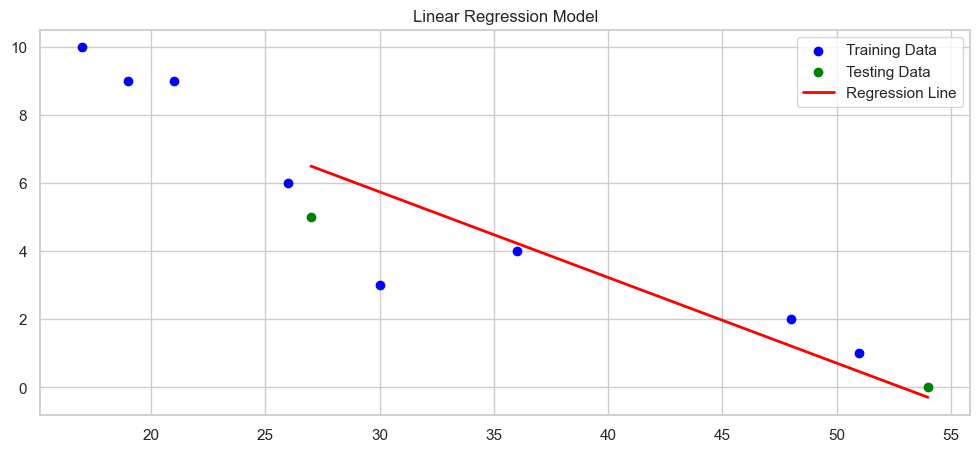

In [15]:
# Visualization of the relations between age and tardies
#sns.lmplot(x="Age", y="Tardies", data=student_data, aspect=2);

# Plot the scatter plot of the training and testing data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')


plt.plot(X_test, y_test_pred, color='red', label='Regression Line')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


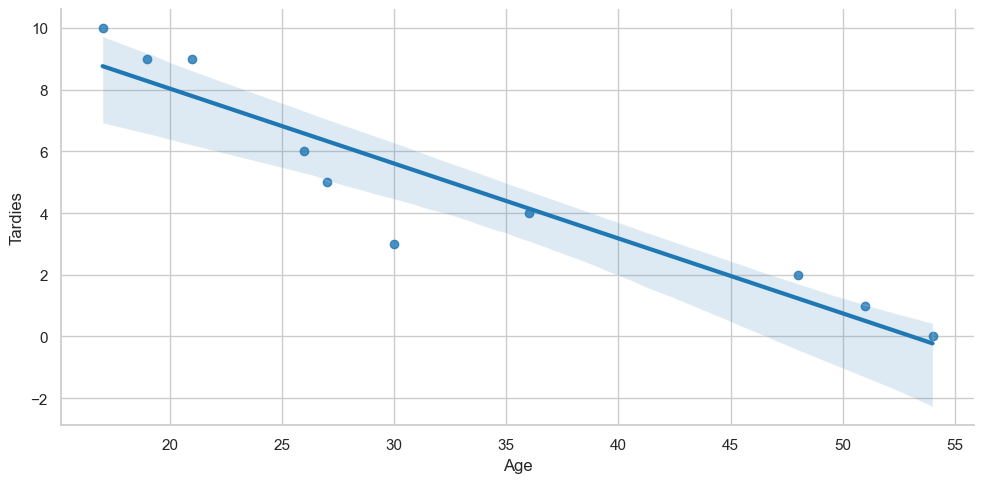

In [16]:
sns.lmplot(x="Age", y="Tardies", data=student_data, aspect=2)


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

**Based on the linear regression model and the plotted regression line, we can conclude that age is a reasonable predictor of tardiness, as there is a negative relationship observed in the data.**

**As age increases, the number of tardies tends to decrease.The regression line captures the general trend of the data, but it does not perfectly fit all data points.**

**However, other factors not included in the model may also contribute to tardiness. While age can be considered as a factor influencing tardiness, it may not be sufficient to predict tardiness accurately.**

**We can be reasonably confident in the conclusion that there is a negative relationship between age and tardies based on the regression line.**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [17]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\Users\adria\Documents\GitHub\lab-regression-analysis-en\vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [18]:
# Select the variables of interest for the second use
variables_2 = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
x_2 = vehicles[variables_2]
y_2 = vehicles['CO2 Emission Grams/Mile']

# Calculate the correlations for the second use
correlations_2 = x_2.corr()['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')

# .drop removes the row corresponding to the outcome variable from the correlation matrix. 
# This ensures that we don't include the correlation of the outcome variable with itself in the final output.
print(correlations_2)

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Type of regression: Multiple Linear Regression
# We model the relationship between multiple predictor variables and a single continuous outcome variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2, random_state=42)

# Create the Linear Regression estimator for the second use
lm_2 = LinearRegression()

# Perform the fitting for the second use
lm_2.fit(X_train, y_train)

# Print coefficients for the second use
print(f"LM Intercept: {lm_2.intercept_}, LM Coefficient: {lm_2.coef_}")

# Make predictions on the testing set for the second use
y_pred_2 = lm_2.predict(X_test)

# Compute MSE for training and testing sets for the second use
y_train_pred_2 = lm_2.predict(X_train)
y_test_pred_2 = lm_2.predict(X_test)

mse_train_2 = np.mean((y_train_pred_2 - y_train)**2)
mse_test_2 = np.mean((y_test_pred_2 - y_test)**2)

# Compute R2 scores for training and testing sets for the second use
r2_train_2 = r2_score(y_train, y_train_pred_2)
r2_test_2 = r2_score(y_test, y_test_pred_2)

print(f"Training MSE: {mse_train_2}, Testing MSE: {mse_test_2}")
print(f"Training R2: {r2_train_2}, Testing R2: {r2_test_2}")

LM Intercept: -5.7411853049416095e-12, LM Coefficient: [ 2.92760527e-15 -7.99360578e-15 -5.47305257e-15 -4.37150316e-16
 -2.22044605e-16  1.00000000e+00]
Training MSE: 5.5520430411822534e-27, Testing MSE: 5.547563884572143e-27
Training R2: 1.0, Testing R2: 1.0


In [20]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(lm_2, x_2, y_2, cv=5, scoring='r2')

print(f"Cross-validated R2 scores: {scores}")
print(f"Mean cross-validated R2 score: {scores.mean()}")


Cross-validated R2 scores: [1. 1. 1. 1. 1.]
Mean cross-validated R2 score: 1.0


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Define the formula for the model
formula = 'y_train ~ X_train'

# Fit the OLS model
model = smf.ols(formula=formula, data=pd.concat([X_train, y_train], axis=1))

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.037e+31
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        17:15:27   Log-Likelihood:             7.5217e+05
No. Observations:               28761   AIC:                        -1.504e+06
Df Residuals:                   28754   BIC:                        -1.504e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.052e-11   1.43e-12     -7.364      0.0

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Create a DataFrame
party = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13] }

df = pd.DataFrame(party)



Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

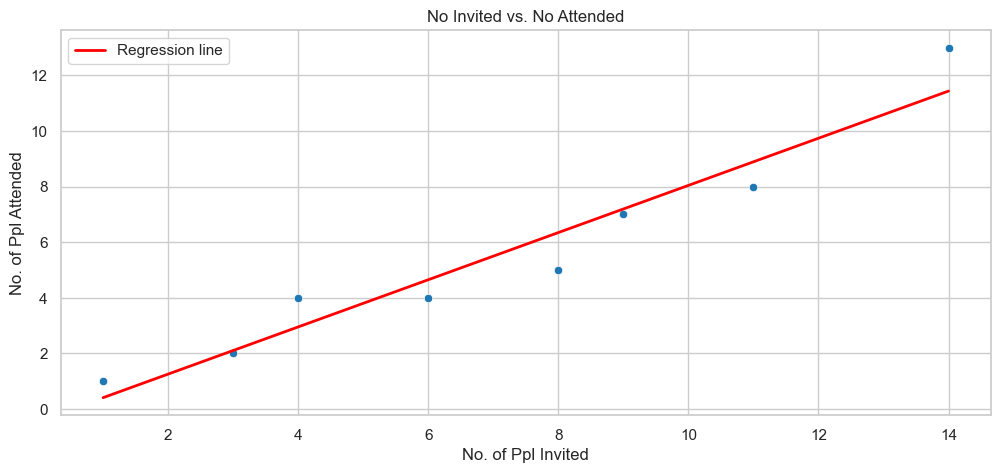

In [23]:
sns.scatterplot(x='X', y='Y', data=df)

# Fit a regression line
X = df[['X']]
y = df['Y']
regressor = LinearRegression()
regressor.fit(X, y)

# Plotting the regression line
plt.plot(X, regressor.predict(X), color='red', label='Regression line')


plt.title('No Invited vs. No Attended')
plt.xlabel('No. of Ppl Invited')
plt.ylabel('No. of Ppl Attended')
plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [24]:
# Print the results from the regression
print("Results:")
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_[0]}")


Results:
Intercept: -0.43939393939393945
Coefficient: 0.8484848484848485


*It appears that there is a positive linear relationship between the number of people invited and the number of people who attended the party. As the number of people invited increases, the number of people who attended also tends to increase.*

*The coeficient 0.8484 indicates that for each additional person invited to the party, we expect approximately 0.8484 more people to attend.*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

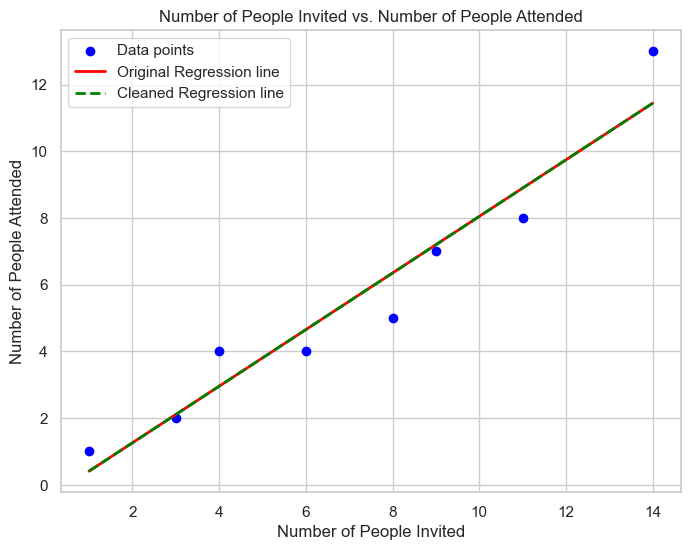

Regression Results (Original Data):
Intercept: -0.43939393939393945
Coefficient: 0.8484848484848485

Regression Results (Cleaned Data):
Intercept: -0.43939393939393945
Coefficient: 0.8484848484848485


In [26]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], color='blue', label='Data points')

# Fit a regression line to the original data
X_orig = df[['X']]
y_orig = df['Y']
regressor_orig = LinearRegression()
regressor_orig.fit(X_orig, y_orig)
plt.plot(X_orig, regressor_orig.predict(X_orig), color='red', linestyle='-', label='Original Regression line')

# Detect and remove outliers using z-score
z_scores = np.abs((y_orig - regressor_orig.predict(X_orig)) / np.std(y_orig))
threshold = 2.5 # Adjust this threshold as needed
df_clean = df[z_scores < threshold]
X_clean = df_clean[['X']]
y_clean = df_clean['Y']

# Fit a regression line to the cleaned data
regressor_clean = LinearRegression()
regressor_clean.fit(X_clean, y_clean)
plt.plot(X_clean, regressor_clean.predict(X_clean), color='green', linestyle='--', label='Cleaned Regression line')

# Labels and legend
plt.title('Number of People Invited vs. Number of People Attended')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.legend()

# Show plot
plt.show()

# Print the results from the regression with cleaned data
print("Regression Results (Original Data):")
print(f"Intercept: {regressor_orig.intercept_}")
print(f"Coefficient: {regressor_orig.coef_[0]}")

print("\nRegression Results (Cleaned Data):")
print(f"Intercept: {regressor_clean.intercept_}")
print(f"Coefficient: {regressor_clean.coef_[0]}")


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*Nothing changed*